In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
### Creating custom word embeddings using gensim library

In [ ]:
## Training a Word2Vec model

In [2]:
from gensim.models import word2vec

In [3]:
docs = ['this movie is good', 'this movie is awesome', 'movie was pathetic']
docs_words = [doc.split(' ') for doc in docs]
docs_words

[['this', 'movie', 'is', 'good'],
 ['this', 'movie', 'is', 'awesome'],
 ['movie', 'was', 'pathetic']]

In [7]:
# dimension of word vector representation
embedding_dim = 50 
# min_count is minimum frequence required for a word to be considered
model = word2vec.Word2Vec(sentences=docs_words, vector_size=embedding_dim, min_count=1, window=2, sg=1)
vocab = model.wv.index_to_key
df_embedding_matrix = pd.DataFrame(model.wv[vocab], index=vocab)
df_embedding_matrix

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
movie,-0.001072,0.000473,0.010207,0.018019,-0.018606,-0.014234,0.012918,0.017946,-0.010031,-0.007527,...,-0.019207,0.010015,-0.017519,-0.008784,-0.000070,-0.000592,-0.015322,0.019229,0.009964,0.018466
is,-0.016316,0.008992,-0.008274,0.001649,0.016997,-0.008924,0.009035,-0.013574,-0.007097,0.018797,...,0.003263,0.000380,0.006947,0.000436,0.019238,0.010121,-0.017835,-0.014083,0.001803,0.012785
this,-0.017239,0.007331,0.010380,0.011484,0.014934,-0.012335,0.002211,0.012095,-0.005680,-0.012347,...,0.015796,-0.013979,-0.018312,-0.000712,-0.006200,0.015789,0.011877,-0.003091,0.003022,0.003580
pathetic,0.015635,-0.019020,-0.000411,0.006938,-0.001878,0.016764,0.018022,0.013073,-0.001423,0.015421,...,0.002175,-0.003152,0.004393,-0.015763,-0.005434,0.005326,0.010693,-0.004783,-0.019020,0.009012
was,0.000189,0.006155,-0.013625,-0.002751,0.015337,0.014693,-0.007347,0.005285,-0.016634,0.012411,...,-0.011188,0.003461,-0.001795,0.013587,0.007947,0.009059,0.002869,-0.005400,-0.008734,-0.002064
awesome,0.002874,-0.005292,-0.014148,-0.015611,-0.018244,-0.011870,-0.003695,-0.008648,-0.012921,-0.007435,...,-0.009019,0.011403,0.018360,-0.008200,0.015929,0.010751,0.011758,0.001025,0.016426,-0.014038
good,-0.016485,0.018599,-0.000395,-0.003935,0.009207,-0.008191,0.005486,0.013880,0.012131,-0.015022,...,0.006860,0.010332,0.012565,-0.005609,0.014645,0.005661,0.005742,-0.004761,-0.006256,-0.004740


In [5]:
vocab

['movie', 'is', 'this', 'pathetic', 'was', 'awesome', 'good']

# Pretrained Word2Vec models

In [16]:
zip_path = 'data/quora-insincere-questions-classification/embeddings.zip'
from zipfile import ZipFile
zf = ZipFile(zip_path)
zf.filelist

[<ZipInfo filename='GoogleNews-vectors-negative300/' filemode='drwxrwxr-x' external_attr=0x10>,
 <ZipInfo filename='glove.840B.300d/' filemode='drwxrwxr-x' external_attr=0x10>,
 <ZipInfo filename='paragram_300_sl999/' filemode='drwxr-xr-x' external_attr=0x10>,
 <ZipInfo filename='wiki-news-300d-1M/' filemode='drwxrwxr-x' external_attr=0x10>,
 <ZipInfo filename='glove.840B.300d/glove.840B.300d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=5646236541 compress_size=2178478737>,
 <ZipInfo filename='GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin' compress_type=deflate filemode='-rw-rw-r--' file_size=3644258522 compress_size=1746270195>,
 <ZipInfo filename='wiki-news-300d-1M/wiki-news-300d-1M.vec' compress_type=deflate filemode='-rw-r--r--' file_size=2259088777 compress_size=682384991>,
 <ZipInfo filename='paragram_300_sl999/README.txt' compress_type=deflate filemode='-rw-r--r--' file_size=731 compress_size=441>,
 <ZipInfo filename='paragram_300_sl999/paragram

In [17]:
from gensim.models import KeyedVectors

In [18]:
embedding_file = 'GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
embeddings = KeyedVectors.load_word2vec_format(zf.open(embedding_file), binary=True)

In [19]:
len(embeddings)

3000000

In [14]:
len(embeddings['computer'])

300

In [15]:
embeddings.most_similar('computer', topn=5)

[('computers', 0.7979379892349243),
 ('laptop', 0.6640493869781494),
 ('laptop_computer', 0.6548868417739868),
 ('Computer', 0.6473335027694702),
 ('com_puter', 0.6082079410552979)]

In [16]:
embeddings.most_similar('dialysis', topn=5)

[('kidney_dialysis', 0.7938171029090881),
 ('hemodialysis', 0.7668044567108154),
 ('dialysis_treatments', 0.714596688747406),
 ('Dialysis', 0.6839954257011414),
 ('renal_dialysis', 0.6658204197883606)]

In [18]:
embeddings.most_similar('peritonitis', topn=5)

[('internal_bleeding', 0.6030535697937012),
 ('bronchopneumonia', 0.5957473516464233),
 ('bowel_obstruction', 0.5952029824256897),
 ('renal_failure', 0.5949323177337646),
 ('bowel_perforation', 0.5859941244125366)]

In [19]:
embeddings.most_similar(positive=['king', 'woman'], negative=['man'], topn=2)

[('queen', 0.7118193507194519), ('monarch', 0.6189674735069275)]

In [20]:
# Negetive side of embeddings

embeddings.most_similar(positive=['computer_programmer', 'woman'], negative=['man'], topn=5)

[('homemaker', 0.5627118945121765),
 ('housewife', 0.5105046629905701),
 ('graphic_designer', 0.505180299282074),
 ('schoolteacher', 0.497949481010437),
 ('businesswoman', 0.493489146232605)]

## Text Classification using pre-trained word embeddings

In [4]:
from gensim.parsing.preprocessing import remove_stopwords

In [5]:
data = pd.read_csv('data/quora-insincere-questions-classification/train.csv').sample(10000)
docs = data['question_text'].str.lower().str.replace('[^a-z\s]', '')
docs = docs.apply(remove_stopwords)
data.head()

<ipython-input-5-17cb95938bd9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  docs = data['question_text'].str.lower().str.replace('[^a-z\s]', '')


,qid,question_text,target
1108909,d94bf3ddbbf06d1808b7,What is fundamentals of information technology?,0
225377,2c140d1fd368daa4a5ae,Is it possible to raise a family on what one m...,0
919967,b447244d801fc617ddf3,Have you ever received a diagnosis of a medica...,0
1057794,cf45848e3bc65ed6e1f7,What is a good program to search and highlight...,0
1097610,d71e829c329310797dff,How can I find out who made a specific friend ...,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_text, y_train, y_test = train_test_split(docs, data['target'], test_size=0.2, random_state=1)

In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab = list(tokenizer.word_index)
print(f'Total number of unique tokens: {len(vocab)}')

Total number of unique tokens: 13043


In [12]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_validate_seq = tokenizer.texts_to_sequences(X_text)
X_train_seq[3]

[5448, 5449, 3497, 51, 3]

<AxesSubplot:>

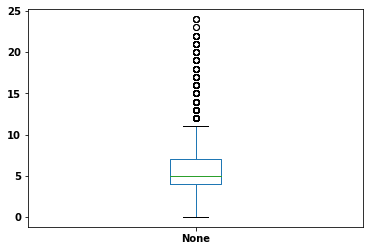

In [13]:
docs_size = []
for doc in X_train_seq:
    size = len(doc)
    docs_size.append(size)
    
    
pd.Series(docs_size).plot.box()

In [14]:
max_doc_len = 10
# max_doc_len = max(docs_size)

X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=max_doc_len)
X_validate_padded = pad_sequences(X_validate_seq, padding='post', maxlen=max_doc_len)
X_train_padded

array([[  84, 1416,  663, ..., 1671,    0,    0],
       [1672,  664,  193, ..., 1067,  840,  124],
       [  17,  941,  299, ...,    0,    0,    0],
       ...,
       [2086,   81,    0, ...,    0,    0,    0],
       [ 629,  506,  520, ...,    0,    0,    0],
       [3710, 1802, 2411, ...,    0,    0,    0]])

In [15]:
len(vocab)

13043

In [21]:
# This +1 is added for 0 padding element
vocab_size = len(vocab) + 1
embedding_dim = 300
words_not_available = []
embedding_maxtrix = np.zeros((vocab_size, embedding_dim))
for word, wid in tokenizer.word_index.items():
    if word in embeddings:
        embedding_maxtrix[wid] = embeddings[word]
    else:
        words_not_available.append(word)

In [22]:
print(f'Percent of words not available {len(words_not_available)/len(vocab)*100}')

Percent of words not available 15.970252242582228


In [23]:
from tensorflow.keras import layers
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,
                          weights = [embedding_maxtrix],
                          input_length=max_doc_len,
                          trainable=False))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_padded, y_train, epochs=10, verbose=1)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4480 - accuracy: 0.9291
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.9377
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2360 - accuracy: 0.9378
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9380
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2126 - accuracy: 0.9380
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2105 - accuracy: 0.9382
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2097 - accuracy: 0.9382
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2092 - accuracy: 0.9381
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2088 - accuracy: 0.9385
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2084 - accuracy: 0.9385

In [26]:
loss = model.evaluate(X_validate_padded, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9490


In [27]:
del embeddings

In [ ]:
# Last 40 minutes